In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from tensorflow.keras.datasets import boston_housing

# Load the Boston Housing dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [3]:
# Convert to DataFrame for easier analysis
train_data = pd.DataFrame(x_train, columns=[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
    'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 
    'B', 'LSTAT'
])
train_data['PRICE'] = y_train

# Display the first few rows of the dataset
train_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [4]:
# Check for missing values
print(train_data.isnull().sum())

# Split the dataset into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


In [5]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [7]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), batch_size=32)

Epoch 1/100
11/11 [==============================] - 1s 34ms/step - loss: 614.6446 - mae: 22.8566 - val_loss: 452.0823 - val_mae: 19.9891
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 574.0968 - mae: 21.9260 - val_loss: 415.4180 - val_mae: 18.9951
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 527.4171 - mae: 20.8287 - val_loss: 371.1740 - val_mae: 17.6808
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 468.3317 - mae: 19.3018 - val_loss: 313.4608 - val_mae: 16.0322
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 387.7139 - mae: 17.1763 - val_loss: 242.3856 - val_mae: 13.8372
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 286.2365 - mae: 14.4159 - val_loss: 166.0666 - val_mae: 11.0578
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 183.5374 - mae: 11.1050 - val_loss: 99.6416 - val_mae: 8.0635
Epoch 8/100
11/11 [=======================

In [8]:
loss, mae = model.evaluate(x_test, y_test)
print(f"Test Mean Absolute Error: {mae:.2f}")

4/4 [==============================] - 0s 3ms/step - loss: 24.1785 - mae: 2.9846
Test Mean Absolute Error: 2.98


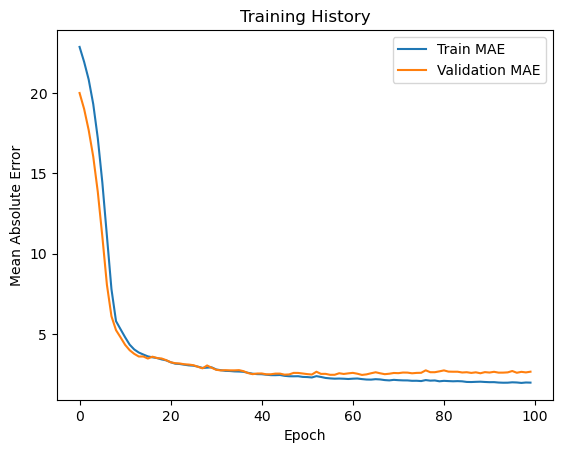

In [9]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training History')
plt.show()

In [10]:
predictions = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


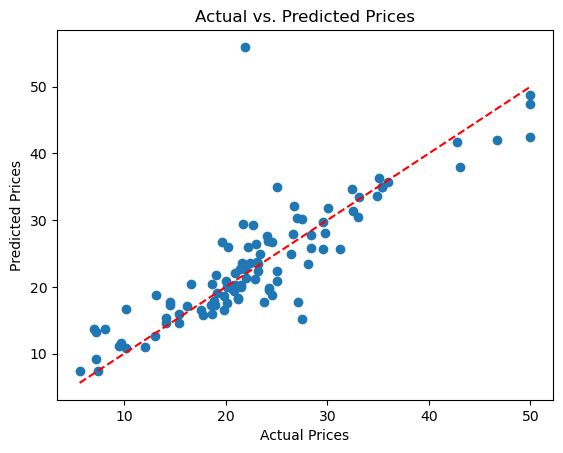

In [11]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

4/4 [==============================] - 0s 3ms/step
y_test shape: (102,)
y_pred shape: (102, 1)
Mean Absolute Error (MAE): 2.98
Mean Squared Error (MSE): 24.18
R² Score: 0.71


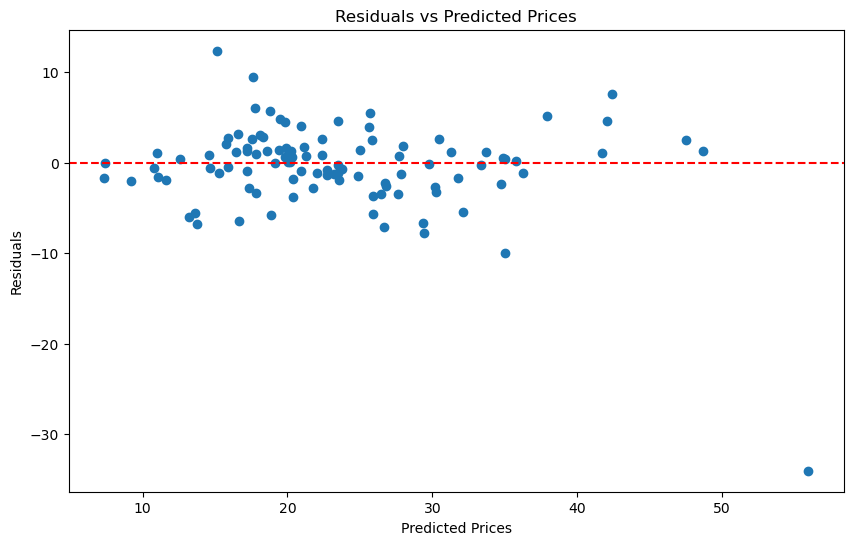

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions for the test set
y_pred = model.predict(x_test)

# Check shapes of y_test and y_pred
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")

# Ensure y_pred is reshaped if necessary
if y_pred.ndim > 1:
    y_pred = y_pred.flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Calculate residuals
residuals = y_test - y_pred

# Visualize the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()
